# Практика

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import laplace
from scipy.stats import norm
from math import sqrt
import math
import seaborn as sns
%matplotlib inline

C:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [7]:
mu = 2.0
sigma = 1.0

# зададим случайную величину (распределение Лапласа)
laplace_rv = laplace(loc=mu, scale=sigma)

# сгенерируем 10 значений
r=laplace_rv.rvs(size=10)

### Постройте гистограмму выборки и теоретическую плотность распределения

Text(0.5, 0, '$x$')

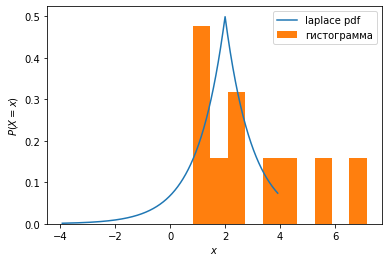

In [9]:
fig, ax = plt.subplots(1, 1) #отрисовка осей
### рисуем PDF (плотность распределения вероятностей)
mean, var, skew, kurt = laplace.stats(moments='mvsk')
x = np.linspace(laplace.ppf(0.01),laplace.ppf(0.99), 1000) 
ax.plot(x, laplace.pdf(x, loc=2, scale=1),label='laplace pdf') 
## рисуем гистрограмму
ax.hist(r, density=True, label='гистограмма')
ax.legend(loc='best')

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

In [18]:
sample_mean = r.mean() # выборочное среднее
print(sample_mean)
sample_var = r.var() # выборочная дисперсия
print(sample_var)

1.9465922738431791
2.078474398516554


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

In [11]:
#вычисляем мат.ожидание и дисперсию
mu=laplace.mean(loc=2, scale=1)
sigma=laplace.std(loc=2, scale=1)
print(mu, sigma)

2.0 1.4142135623730951


In [12]:
#генирируем выборку средних из пяти величин
r1=[]
for i in range (1000):
    r1.append(np.mean(laplace.rvs(size=5, loc=2, scale=1)))
#генирируем выборку средних из десяти величин
r2=[]
for i in range (1000):
    r2.append(np.mean(laplace.rvs(size=10, loc=2, scale=1)))
#генирируем выборку средних из пятидесяти величин
r3=[]
for i in range (1000):
    r3.append(np.mean(laplace.rvs(size=50, loc=2, scale=1)))
#генирируем выборку средних из тысячи величин
r4=[]
for i in range (1000):
    r4.append(np.mean(laplace.rvs(size=1000, loc=2, scale=1)))

Text(0.5, 0, '$x$')

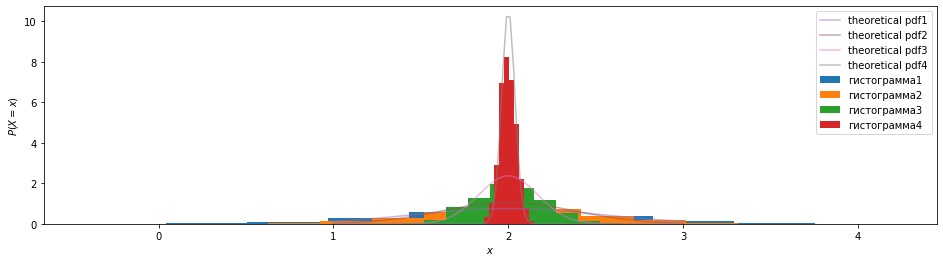

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4)) #отрисовка осей
# рисуем гистограмму
mean, var, skew, kurt = laplace.stats(moments='mvsk')
ax.hist(r1, density=True, label='гистограмма1') 
ax.hist(r2, density=True, label='гистограмма2')
ax.hist(r3, density=True, label='гистограмма3')
ax.hist(r4, density=True, label='гистограмма4')
# на том же графике построим теоретическую плотность распределения:
x = np.linspace(1,3,100)
pdf1 = norm.pdf(x, loc=mu, scale=sqrt(sigma/5))
pdf2 = norm.pdf(x, loc=mu, scale=sqrt(sigma/10))
pdf3 = norm.pdf(x, loc=mu, scale=sqrt(sigma/50))
pdf4 = norm.pdf(x, loc=mu, scale=sqrt(sigma/1000))
plt.plot(x, pdf1, label='theoretical pdf1', alpha=0.5)
plt.plot(x, pdf2, label='theoretical pdf2', alpha=0.5)
plt.plot(x, pdf3, label='theoretical pdf3', alpha=0.5)
plt.plot(x, pdf4, label='theoretical pdf4', alpha=0.5)

ax.legend(loc='best')
plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

Вывод: Таким образом ЦПТ для распределения Лапласа подтвердилась, а именно при увеличении выборки из средних значений, это распределение всё больше становится похожим на нормальное распределение.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [16]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df.head())

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


https://github.com/KonKorychev/work_19/blob/main/README.md
https://habr.com/ru/company/X5Tech/blog/679842/

In [18]:
df.shape

(3333, 21)

In [19]:
df.describe(include=np.number)

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [30]:
df['churn']

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Name: churn, Length: 3333, dtype: bool

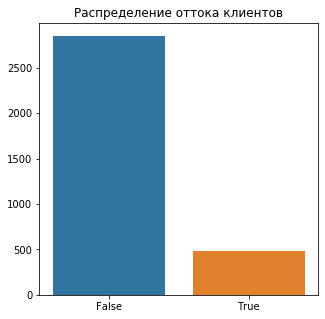

In [35]:
# Определение размеров диаграммы
plt.subplots(figsize=(5, 5))

# Построение распределения целевого признака
ax = sns.countplot(df['churn'])

# Оформление диаграммы
plt.setp(ax, xlabel=None, ylabel=None, title='Распределение оттока клиентов')

# Вывод диаграммы
plt.show()

In [83]:
#выборка с False
df_f=df.query('churn==False')['total day calls']

In [84]:
#выборка с True
df_t=df.query('churn==True')['total day calls']

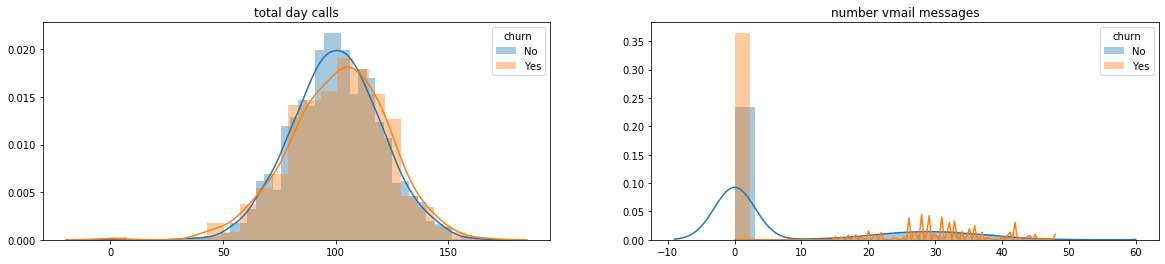

In [85]:
# Создание основных объектов диаграммы
fig, axes = plt.subplots(1, 2, figsize=(20, 4))

# Построение диаграмм распределения случайных величин
for column, ax in zip(['total day calls','number vmail messages'], axes.flat):
    sns.distplot(df.query('churn==False')[column], label='No', ax=ax).set_title(column)
    sns.distplot(df.query('churn==True')[column], label='Yes', ax=ax).set_title(column)
    ax.legend(loc='upper right', title='churn')

# Оформление диаграммы
plt.setp(axes, xlabel=None, ylabel=None)

# Вывод диаграмм
plt.show()

In [92]:
import statsmodels.stats.weightstats as ssw

In [95]:
data, N = df_f, len(df_f)

print("Доверительный интервал для среднего неушедших клиентов по цпт интервальная оценка: {} ".format(
    sts.norm.interval(alpha=0.95, loc=np.mean(data), 
                      scale=np.std(data, ddof=1)/np.sqrt(N-1)) # alternative 'two-sided' only
))

print("Доверительный интервал для среднего неушедших клиентов по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(data),  np.std(data, ddof=1), alpha=0.95, alternative='two-sided')
))

Доверительный интервал для среднего неушедших клиентов по цпт интервальная оценка: (99.55606076109109, 101.0102550283826) 
Доверительный интервал для среднего неушедших клиентов по цпт методом _zconfint_generic: (99.04149114274125, 101.52482464673244) 


In [96]:
data, N = df_t, len(df_t)

print("Доверительный интервал для среднего ушедших клиентов по цпт интервальная оценка: {} ".format(
    sts.norm.interval(alpha=0.95, loc=np.mean(data), 
                      scale=np.std(data, ddof=1)/np.sqrt(N-1)) # alternative 'two-sided' only
))

print("Доверительный интервал для среднего ушедших клиентов по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(data),  np.std(data, ddof=1), alpha=0.95, alternative='two-sided')
))

Доверительный интервал для среднего ушедших клиентов по цпт интервальная оценка: (99.40866670589261, 103.26214074752355) 
Доверительный интервал для среднего ушедших клиентов по цпт методом _zconfint_generic: (99.98204678079553, 102.68876067262063) 
